In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## NewYork City Bike
在预测模型训练之前对数据进行清洗， 数据清洗的代码已经整理在 `citibikeUtil.py`中，预测器的代码已经整理在`predictor.py`中，
`citybikeDraw.py`是用来生成图片的文件 `citybikeMetrics.py`计算指标

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901

from predictor import DecisionTreePredictor, XGBoostPredictor

Using TensorFlow backend.


## XgboostPredictor

In [3]:
xgb = XGBoostPredictor()

### 训练模型

In [4]:
test_x, test_y = xgb.get_train_vec([CB201809])

100%|██████████| 1/1 [00:20<00:00, 20.02s/it]


In [5]:
train_x, train_y = xgb.get_train_vec([CB201808])

100%|██████████| 1/1 [00:28<00:00, 28.36s/it]


In [6]:
predictor = xgb.train_model(train_x, train_y, [(test_x, test_y)])

[0]	validation_0-rmse:0.263512
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.240711
[2]	validation_0-rmse:0.220523
[3]	validation_0-rmse:0.202444
[4]	validation_0-rmse:0.186717
[5]	validation_0-rmse:0.172708
[6]	validation_0-rmse:0.16048
[7]	validation_0-rmse:0.149846
[8]	validation_0-rmse:0.140159
[9]	validation_0-rmse:0.131806
[10]	validation_0-rmse:0.124643
[11]	validation_0-rmse:0.118455
[12]	validation_0-rmse:0.11346
[13]	validation_0-rmse:0.108845
[14]	validation_0-rmse:0.105029
[15]	validation_0-rmse:0.101197
[16]	validation_0-rmse:0.098491
[17]	validation_0-rmse:0.096129
[18]	validation_0-rmse:0.09427
[19]	validation_0-rmse:0.092114
[20]	validation_0-rmse:0.090746
[21]	validation_0-rmse:0.089222
[22]	validation_0-rmse:0.088902
[23]	validation_0-rmse:0.088161
[24]	validation_0-rmse:0.087272
[25]	validation_0-rmse:0.0867
[26]	validation_0-rmse:0.085939
[27]	validation_0-rmse:0.085535
[28]	validation_0-rmse:0.085779
[29]	validation_0-rmse

In [7]:
predict_y = predictor.predict(test_x)

In [8]:
len(predict_y), len(test_y)

(720, 720)

### 根据预测结果的个数生成 时间间隔 

预测月份是11月份 freq代表频率 'H'代表小时 每小时生成一个

### 使用seaborn画图需要将数据合成df

In [9]:
date_index = pd.date_range(start='2018-09-01 00:00:00', periods=len(test_y), freq='H')
merge_data = {
    'predict': predict_y.tolist(),
    'real':  test_y['res'].tolist()
}
xgb_df = pd.DataFrame(merge_data, index=date_index)

In [10]:
xgb_df.to_csv("xgb_df.csv")

## 实验结果展示

In [11]:
sns.set(style="whitegrid")
sns.set_context(rc={"lines.linewidth": 2})

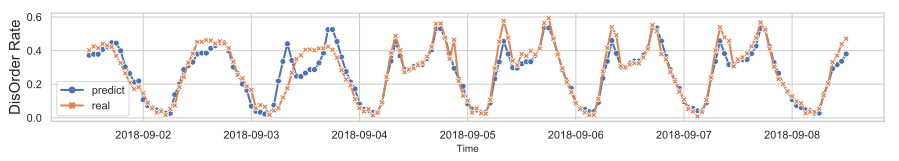

In [12]:
# plt.figure(figsize=(15, 5))
f, ax = plt.subplots(figsize = (15, 2))
# 设置图名称
# ax.set_title('DataStream DisOrder Predict - 1st Week', fontsize=15)
# 设置X轴 Y轴 的label
ax.set_xlabel('Time',fontsize=10)
ax.set_ylabel('DisOrder Rate',fontsize=15)
sns.lineplot(size='event',
             markers=True,dashes=False,
             data=xgb_df[12:181])
plt.savefig('xgboost-bike.eps',bbox_inches='tight',format='eps')

## 封装成一个画图类

In [13]:
from citybikeDraw import DrawXgboost
draw = DrawXgboost()
test_y, predict_y = draw.get_predict_result([CB201808], [CB201809])

100%|██████████| 1/1 [00:34<00:00, 34.57s/it]

[0]	validation_0-rmse:0.263512
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.240711
[2]	validation_0-rmse:0.220523
[3]	validation_0-rmse:0.202444
[4]	validation_0-rmse:0.186717
[5]	validation_0-rmse:0.172708
[6]	validation_0-rmse:0.16048
[7]	validation_0-rmse:0.149846
[8]	validation_0-rmse:0.140159
[9]	validation_0-rmse:0.131806
[10]	validation_0-rmse:0.124643
[11]	validation_0-rmse:0.118455
[12]	validation_0-rmse:0.11346
[13]	validation_0-rmse:0.108845
[14]	validation_0-rmse:0.105029
[15]	validation_0-rmse:0.101197
[16]	validation_0-rmse:0.098491
[17]	validation_0-rmse:0.096129
[18]	validation_0-rmse:0.09427
[19]	validation_0-rmse:0.092114
[20]	validation_0-rmse:0.090746
[21]	validation_0-rmse:0.089222
[22]	validation_0-rmse:0.088902
[23]	validation_0-rmse:0.088161
[24]	validation_0-rmse:0.087272
[25]	validation_0-rmse:0.0867
[26]	validation_0-rmse:0.085939
[27]	validation_0-rmse:0.085535
[28]	validation_0-rmse:0.085779
[29]	validation_0-rmse

[74]	validation_0-rmse:0.083084
[75]	validation_0-rmse:0.082875
[76]	validation_0-rmse:0.082872
[77]	validation_0-rmse:0.082793
[78]	validation_0-rmse:0.082763
[79]	validation_0-rmse:0.082766
[80]	validation_0-rmse:0.082867
[81]	validation_0-rmse:0.082663
[82]	validation_0-rmse:0.082766
[83]	validation_0-rmse:0.082777
[84]	validation_0-rmse:0.082916
[85]	validation_0-rmse:0.082717
[86]	validation_0-rmse:0.082457
[87]	validation_0-rmse:0.082219
[88]	validation_0-rmse:0.082274
[89]	validation_0-rmse:0.082218
[90]	validation_0-rmse:0.082353
[91]	validation_0-rmse:0.08233
[92]	validation_0-rmse:0.082345
[93]	validation_0-rmse:0.082506
[94]	validation_0-rmse:0.08262
[95]	validation_0-rmse:0.082489
[96]	validation_0-rmse:0.082347
[97]	validation_0-rmse:0.08217
[98]	validation_0-rmse:0.082278
[99]	validation_0-rmse:0.082302
[100]	validation_0-rmse:0.082181
[101]	validation_0-rmse:0.08189
[102]	validation_0-rmse:0.081932
[103]	validation_0-rmse:0.081949
[104]	validation_0-rmse:0.081705
[105]	v

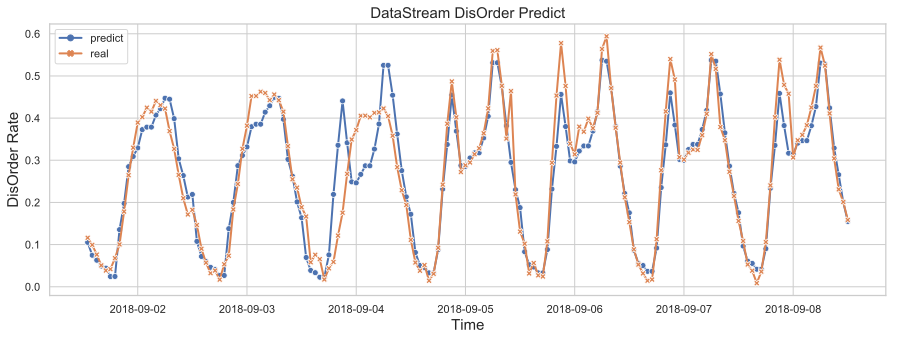

In [14]:
draw.draw_real_predict(
    week_num=1,
    start_time="2018-09-01 13:00:00",
    title="DataStream DisOrder Predict",
    figsize=(15,5)
)

## 回归性能指标

In [15]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [16]:
from citybikeMetrics import get_xgb_metrics
import pandas as pd
from citybikeUtil import CB201808, CB201809, CB201810, CB201811, CB201812, CB201901, CB201902

In [17]:
months = [CB201808, CB201809, CB201810, CB201811, CB201812, CB201901, CB201902]

In [18]:
update_metrics = get_xgb_metrics(months, True)
unupdate_metrics = get_xgb_metrics(months, False)
result = pd.concat([update_metrics,unupdate_metrics], axis=1)
result.columns = [["Update Model","Update Model","Update Model","UnUpdate Model","UnUpdate Model","UnUpdate Model"],["RMSE", "MAE", "R2S","RMSE", "MAE", "R2S"]]

100%|██████████| 1/1 [00:26<00:00, 26.80s/it]

[0]	validation_0-rmse:0.263512
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.240711
[2]	validation_0-rmse:0.220523
[3]	validation_0-rmse:0.202444
[4]	validation_0-rmse:0.186717
[5]	validation_0-rmse:0.172708
[6]	validation_0-rmse:0.16048
[7]	validation_0-rmse:0.149846
[8]	validation_0-rmse:0.140159
[9]	validation_0-rmse:0.131806
[10]	validation_0-rmse:0.124643
[11]	validation_0-rmse:0.118455
[12]	validation_0-rmse:0.11346
[13]	validation_0-rmse:0.108845
[14]	validation_0-rmse:0.105029
[15]	validation_0-rmse:0.101197
[16]	validation_0-rmse:0.098491
[17]	validation_0-rmse:0.096129
[18]	validation_0-rmse:0.09427
[19]	validation_0-rmse:0.092114
[20]	validation_0-rmse:0.090746
[21]	validation_0-rmse:0.089222
[22]	validation_0-rmse:0.088902
[23]	validation_0-rmse:0.088161
[24]	validation_0-rmse:0.087272
[25]	validation_0-rmse:0.0867
[26]	validation_0-rmse:0.085939
[27]	validation_0-rmse:0.085535
[28]	validation_0-rmse:0.085779
[29]	validation_0-rmse

[70]	validation_0-rmse:0.083284
[71]	validation_0-rmse:0.083467
[72]	validation_0-rmse:0.083106
[73]	validation_0-rmse:0.083
[74]	validation_0-rmse:0.083084
[75]	validation_0-rmse:0.082875
[76]	validation_0-rmse:0.082872
[77]	validation_0-rmse:0.082793
[78]	validation_0-rmse:0.082763
[79]	validation_0-rmse:0.082766
[80]	validation_0-rmse:0.082867
[81]	validation_0-rmse:0.082663
[82]	validation_0-rmse:0.082766
[83]	validation_0-rmse:0.082777
[84]	validation_0-rmse:0.082916
[85]	validation_0-rmse:0.082717
[86]	validation_0-rmse:0.082457
[87]	validation_0-rmse:0.082219
[88]	validation_0-rmse:0.082274
[89]	validation_0-rmse:0.082218
[90]	validation_0-rmse:0.082353
[91]	validation_0-rmse:0.08233
[92]	validation_0-rmse:0.082345
[93]	validation_0-rmse:0.082506
[94]	validation_0-rmse:0.08262
[95]	validation_0-rmse:0.082489
[96]	validation_0-rmse:0.082347
[97]	validation_0-rmse:0.08217
[98]	validation_0-rmse:0.082278
[99]	validation_0-rmse:0.082302
[100]	validation_0-rmse:0.082181
[101]	validat

100%|██████████| 1/1 [00:19<00:00, 20.00s/it]

[0]	validation_0-rmse:0.250661
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.229763
[2]	validation_0-rmse:0.211183
[3]	validation_0-rmse:0.195051
[4]	validation_0-rmse:0.18157
[5]	validation_0-rmse:0.169714
[6]	validation_0-rmse:0.159492
[7]	validation_0-rmse:0.151035
[8]	validation_0-rmse:0.144058
[9]	validation_0-rmse:0.13815
[10]	validation_0-rmse:0.132933
[11]	validation_0-rmse:0.129045
[12]	validation_0-rmse:0.125719
[13]	validation_0-rmse:0.122706
[14]	validation_0-rmse:0.120343
[15]	validation_0-rmse:0.119847
[16]	validation_0-rmse:0.119435
[17]	validation_0-rmse:0.118995
[18]	validation_0-rmse:0.118785
[19]	validation_0-rmse:0.118887
[20]	validation_0-rmse:0.118296
[21]	validation_0-rmse:0.119098
[22]	validation_0-rmse:0.119009
[23]	validation_0-rmse:0.11904
[24]	validation_0-rmse:0.119865
[25]	validation_0-rmse:0.119661
[26]	validation_0-rmse:0.120432
[27]	validation_0-rmse:0.120007
[28]	validation_0-rmse:0.121224
[29]	validation_0-rm


100%|██████████| 1/1 [00:12<00:00, 12.75s/it]

[0]	validation_0-rmse:0.255426
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.238019
[2]	validation_0-rmse:0.223123
[3]	validation_0-rmse:0.210519
[4]	validation_0-rmse:0.199606
[5]	validation_0-rmse:0.190467
[6]	validation_0-rmse:0.183069
[7]	validation_0-rmse:0.176732
[8]	validation_0-rmse:0.171558
[9]	validation_0-rmse:0.167585
[10]	validation_0-rmse:0.163974
[11]	validation_0-rmse:0.161407
[12]	validation_0-rmse:0.15865
[13]	validation_0-rmse:0.156252
[14]	validation_0-rmse:0.154676
[15]	validation_0-rmse:0.15401
[16]	validation_0-rmse:0.152951
[17]	validation_0-rmse:0.152747
[18]	validation_0-rmse:0.151792
[19]	validation_0-rmse:0.150864
[20]	validation_0-rmse:0.150378
[21]	validation_0-rmse:0.150716
[22]	validation_0-rmse:0.150065
[23]	validation_0-rmse:0.150268
[24]	validation_0-rmse:0.150522
[25]	validation_0-rmse:0.149894
[26]	validation_0-rmse:0.149767
[27]	validation_0-rmse:0.150535
[28]	validation_0-rmse:0.150482
[29]	validation_0-r

[68]	validation_0-rmse:0.150463
[69]	validation_0-rmse:0.150354
[70]	validation_0-rmse:0.150025
[71]	validation_0-rmse:0.1499
[72]	validation_0-rmse:0.149944
[73]	validation_0-rmse:0.150095
[74]	validation_0-rmse:0.149649
[75]	validation_0-rmse:0.149687
[76]	validation_0-rmse:0.149689
[77]	validation_0-rmse:0.149506
[78]	validation_0-rmse:0.149454
[79]	validation_0-rmse:0.149186
[80]	validation_0-rmse:0.148938
[81]	validation_0-rmse:0.14875
[82]	validation_0-rmse:0.148655
[83]	validation_0-rmse:0.148428
[84]	validation_0-rmse:0.148286
[85]	validation_0-rmse:0.148321
[86]	validation_0-rmse:0.148238
[87]	validation_0-rmse:0.14817
[88]	validation_0-rmse:0.147946
[89]	validation_0-rmse:0.147905
[90]	validation_0-rmse:0.147799
[91]	validation_0-rmse:0.147778
[92]	validation_0-rmse:0.14749
[93]	validation_0-rmse:0.147413
[94]	validation_0-rmse:0.147421
[95]	validation_0-rmse:0.14739
[96]	validation_0-rmse:0.147248
[97]	validation_0-rmse:0.147183
[98]	validation_0-rmse:0.147177
[99]	validatio

100%|██████████| 1/1 [00:11<00:00, 11.01s/it]

[0]	validation_0-rmse:0.258897
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.241605
[2]	validation_0-rmse:0.226564
[3]	validation_0-rmse:0.213559
[4]	validation_0-rmse:0.202296
[5]	validation_0-rmse:0.191333
[6]	validation_0-rmse:0.181855
[7]	validation_0-rmse:0.174824
[8]	validation_0-rmse:0.167816
[9]	validation_0-rmse:0.16247
[10]	validation_0-rmse:0.158534
[11]	validation_0-rmse:0.153763
[12]	validation_0-rmse:0.15041
[13]	validation_0-rmse:0.147312
[14]	validation_0-rmse:0.144794
[15]	validation_0-rmse:0.142357
[16]	validation_0-rmse:0.140671
[17]	validation_0-rmse:0.13894
[18]	validation_0-rmse:0.137878
[19]	validation_0-rmse:0.137272
[20]	validation_0-rmse:0.135655
[21]	validation_0-rmse:0.133694
[22]	validation_0-rmse:0.133246
[23]	validation_0-rmse:0.133343
[24]	validation_0-rmse:0.133327
[25]	validation_0-rmse:0.133359
[26]	validation_0-rmse:0.133458
[27]	validation_0-rmse:0.133711
[28]	validation_0-rmse:0.134041
[29]	validation_0-rm

[85]	validation_0-rmse:0.134969
[86]	validation_0-rmse:0.135099
[87]	validation_0-rmse:0.135305
Stopping. Best iteration:
[37]	validation_0-rmse:0.132834



100%|██████████| 1/1 [00:09<00:00,  9.06s/it]

[0]	validation_0-rmse:0.256454
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.237437
[2]	validation_0-rmse:0.221
[3]	validation_0-rmse:0.206778
[4]	validation_0-rmse:0.193739
[5]	validation_0-rmse:0.183059
[6]	validation_0-rmse:0.173097
[7]	validation_0-rmse:0.165248
[8]	validation_0-rmse:0.157637
[9]	validation_0-rmse:0.15105
[10]	validation_0-rmse:0.145542
[11]	validation_0-rmse:0.141362
[12]	validation_0-rmse:0.137633
[13]	validation_0-rmse:0.134555
[14]	validation_0-rmse:0.132544
[15]	validation_0-rmse:0.130597
[16]	validation_0-rmse:0.128669
[17]	validation_0-rmse:0.126847
[18]	validation_0-rmse:0.126218
[19]	validation_0-rmse:0.125202
[20]	validation_0-rmse:0.124436
[21]	validation_0-rmse:0.123899
[22]	validation_0-rmse:0.122876
[23]	validation_0-rmse:0.122631
[24]	validation_0-rmse:0.122271
[25]	validation_0-rmse:0.121959
[26]	validation_0-rmse:0.122303
[27]	validation_0-rmse:0.121552
[28]	validation_0-rmse:0.121026
[29]	validation_0-rms

[105]	validation_0-rmse:0.114911
[106]	validation_0-rmse:0.114407
[107]	validation_0-rmse:0.114638
[108]	validation_0-rmse:0.114582
[109]	validation_0-rmse:0.114687
[110]	validation_0-rmse:0.114988
[111]	validation_0-rmse:0.115154
[112]	validation_0-rmse:0.115463
[113]	validation_0-rmse:0.115379
[114]	validation_0-rmse:0.114655
[115]	validation_0-rmse:0.114034
[116]	validation_0-rmse:0.114124
[117]	validation_0-rmse:0.11431
[118]	validation_0-rmse:0.114572
[119]	validation_0-rmse:0.114338
[120]	validation_0-rmse:0.114247
[121]	validation_0-rmse:0.114185
[122]	validation_0-rmse:0.114343
[123]	validation_0-rmse:0.11429
[124]	validation_0-rmse:0.114246
[125]	validation_0-rmse:0.114222
[126]	validation_0-rmse:0.114126
[127]	validation_0-rmse:0.114266
[128]	validation_0-rmse:0.114106
[129]	validation_0-rmse:0.114086
[130]	validation_0-rmse:0.11419
[131]	validation_0-rmse:0.11418
[132]	validation_0-rmse:0.114319
[133]	validation_0-rmse:0.114388
[134]	validation_0-rmse:0.114594
[135]	validati

100%|██████████| 1/1 [00:09<00:00,  9.08s/it]

[0]	validation_0-rmse:0.252735
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.233815
[2]	validation_0-rmse:0.21696
[3]	validation_0-rmse:0.202308
[4]	validation_0-rmse:0.188866
[5]	validation_0-rmse:0.177161
[6]	validation_0-rmse:0.167058
[7]	validation_0-rmse:0.158577
[8]	validation_0-rmse:0.151573
[9]	validation_0-rmse:0.145057
[10]	validation_0-rmse:0.139587
[11]	validation_0-rmse:0.134906
[12]	validation_0-rmse:0.131247
[13]	validation_0-rmse:0.127984
[14]	validation_0-rmse:0.124844
[15]	validation_0-rmse:0.122615
[16]	validation_0-rmse:0.118816
[17]	validation_0-rmse:0.117425
[18]	validation_0-rmse:0.114253
[19]	validation_0-rmse:0.111981
[20]	validation_0-rmse:0.109648
[21]	validation_0-rmse:0.109259
[22]	validation_0-rmse:0.107237
[23]	validation_0-rmse:0.106988
[24]	validation_0-rmse:0.105471
[25]	validation_0-rmse:0.105083
[26]	validation_0-rmse:0.105119
[27]	validation_0-rmse:0.104605
[28]	validation_0-rmse:0.104632
[29]	validation_0-

[110]	validation_0-rmse:0.092225
[111]	validation_0-rmse:0.092171
[112]	validation_0-rmse:0.092304
[113]	validation_0-rmse:0.092191
[114]	validation_0-rmse:0.092325
[115]	validation_0-rmse:0.091971
[116]	validation_0-rmse:0.091361
[117]	validation_0-rmse:0.090839
[118]	validation_0-rmse:0.090617
[119]	validation_0-rmse:0.090202
[120]	validation_0-rmse:0.090095
[121]	validation_0-rmse:0.090261
[122]	validation_0-rmse:0.090291
[123]	validation_0-rmse:0.090192
[124]	validation_0-rmse:0.090267
[125]	validation_0-rmse:0.090118
[126]	validation_0-rmse:0.090029
[127]	validation_0-rmse:0.089949
[128]	validation_0-rmse:0.089936
[129]	validation_0-rmse:0.089979
[130]	validation_0-rmse:0.090031
[131]	validation_0-rmse:0.090141
[132]	validation_0-rmse:0.090128
[133]	validation_0-rmse:0.090073
[134]	validation_0-rmse:0.090106
[135]	validation_0-rmse:0.089957
[136]	validation_0-rmse:0.090039
[137]	validation_0-rmse:0.090081
[138]	validation_0-rmse:0.090058
[139]	validation_0-rmse:0.089989
[140]	vali

100%|██████████| 1/1 [00:17<00:00, 17.20s/it]

[0]	validation_0-rmse:0.263512
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.240711
[2]	validation_0-rmse:0.220523
[3]	validation_0-rmse:0.202444
[4]	validation_0-rmse:0.186717
[5]	validation_0-rmse:0.172708
[6]	validation_0-rmse:0.16048
[7]	validation_0-rmse:0.149846
[8]	validation_0-rmse:0.140159
[9]	validation_0-rmse:0.131806
[10]	validation_0-rmse:0.124643
[11]	validation_0-rmse:0.118455
[12]	validation_0-rmse:0.11346
[13]	validation_0-rmse:0.108845
[14]	validation_0-rmse:0.105029
[15]	validation_0-rmse:0.101197
[16]	validation_0-rmse:0.098491
[17]	validation_0-rmse:0.096129
[18]	validation_0-rmse:0.09427
[19]	validation_0-rmse:0.092114
[20]	validation_0-rmse:0.090746
[21]	validation_0-rmse:0.089222
[22]	validation_0-rmse:0.088902
[23]	validation_0-rmse:0.088161
[24]	validation_0-rmse:0.087272
[25]	validation_0-rmse:0.0867
[26]	validation_0-rmse:0.085939
[27]	validation_0-rmse:0.085535
[28]	validation_0-rmse:0.085779
[29]	validation_0-rmse

[117]	validation_0-rmse:0.082063
[118]	validation_0-rmse:0.08204
[119]	validation_0-rmse:0.082011
[120]	validation_0-rmse:0.082125
[121]	validation_0-rmse:0.082156
[122]	validation_0-rmse:0.082209
[123]	validation_0-rmse:0.082201
[124]	validation_0-rmse:0.082199
[125]	validation_0-rmse:0.082189
[126]	validation_0-rmse:0.082201
[127]	validation_0-rmse:0.082218
[128]	validation_0-rmse:0.082246
[129]	validation_0-rmse:0.082272
[130]	validation_0-rmse:0.082285
[131]	validation_0-rmse:0.082268
[132]	validation_0-rmse:0.082076
[133]	validation_0-rmse:0.082074
[134]	validation_0-rmse:0.082099
[135]	validation_0-rmse:0.08211
[136]	validation_0-rmse:0.082111
[137]	validation_0-rmse:0.08214
[138]	validation_0-rmse:0.082144
[139]	validation_0-rmse:0.082125
[140]	validation_0-rmse:0.082105
[141]	validation_0-rmse:0.082048
[142]	validation_0-rmse:0.082059
[143]	validation_0-rmse:0.082197
[144]	validation_0-rmse:0.082197
[145]	validation_0-rmse:0.082231
[146]	validation_0-rmse:0.082188
[147]	validat

100%|██████████| 1/1 [00:19<00:00, 19.35s/it]

[0]	validation_0-rmse:0.250323
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.229167
[2]	validation_0-rmse:0.210764
[3]	validation_0-rmse:0.194505
[4]	validation_0-rmse:0.180836
[5]	validation_0-rmse:0.168885
[6]	validation_0-rmse:0.158799
[7]	validation_0-rmse:0.150364
[8]	validation_0-rmse:0.142973
[9]	validation_0-rmse:0.136869
[10]	validation_0-rmse:0.131939
[11]	validation_0-rmse:0.12803
[12]	validation_0-rmse:0.125029
[13]	validation_0-rmse:0.122258
[14]	validation_0-rmse:0.120309
[15]	validation_0-rmse:0.117936
[16]	validation_0-rmse:0.116786
[17]	validation_0-rmse:0.115672
[18]	validation_0-rmse:0.114998
[19]	validation_0-rmse:0.113878
[20]	validation_0-rmse:0.113367
[21]	validation_0-rmse:0.11261
[22]	validation_0-rmse:0.112488
[23]	validation_0-rmse:0.112439
[24]	validation_0-rmse:0.112002
[25]	validation_0-rmse:0.111871
[26]	validation_0-rmse:0.111529
[27]	validation_0-rmse:0.111406
[28]	validation_0-rmse:0.111514
[29]	validation_0-r

[101]	validation_0-rmse:0.108585
[102]	validation_0-rmse:0.108594
[103]	validation_0-rmse:0.108689
[104]	validation_0-rmse:0.108495
[105]	validation_0-rmse:0.108505
[106]	validation_0-rmse:0.108502
[107]	validation_0-rmse:0.108425
[108]	validation_0-rmse:0.108449
[109]	validation_0-rmse:0.108429
[110]	validation_0-rmse:0.108402
[111]	validation_0-rmse:0.108444
[112]	validation_0-rmse:0.108452
[113]	validation_0-rmse:0.108451
[114]	validation_0-rmse:0.108339
[115]	validation_0-rmse:0.10833
[116]	validation_0-rmse:0.10831
[117]	validation_0-rmse:0.1083
[118]	validation_0-rmse:0.108278
[119]	validation_0-rmse:0.108306
[120]	validation_0-rmse:0.108296
[121]	validation_0-rmse:0.10837
[122]	validation_0-rmse:0.108354
[123]	validation_0-rmse:0.108337
[124]	validation_0-rmse:0.108333
[125]	validation_0-rmse:0.108337
[126]	validation_0-rmse:0.108348
[127]	validation_0-rmse:0.108332
[128]	validation_0-rmse:0.10839
[129]	validation_0-rmse:0.108415
[130]	validation_0-rmse:0.108403
[131]	validation

100%|██████████| 1/1 [00:11<00:00, 11.81s/it]

[0]	validation_0-rmse:0.255345
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.238391
[2]	validation_0-rmse:0.22435
[3]	validation_0-rmse:0.212594
[4]	validation_0-rmse:0.20338
[5]	validation_0-rmse:0.195864
[6]	validation_0-rmse:0.190053
[7]	validation_0-rmse:0.185659
[8]	validation_0-rmse:0.18206
[9]	validation_0-rmse:0.179471
[10]	validation_0-rmse:0.177686
[11]	validation_0-rmse:0.176726
[12]	validation_0-rmse:0.176206
[13]	validation_0-rmse:0.175735
[14]	validation_0-rmse:0.175855
[15]	validation_0-rmse:0.175422
[16]	validation_0-rmse:0.175862
[17]	validation_0-rmse:0.17614
[18]	validation_0-rmse:0.176601
[19]	validation_0-rmse:0.176865
[20]	validation_0-rmse:0.17729
[21]	validation_0-rmse:0.177534
[22]	validation_0-rmse:0.178165
[23]	validation_0-rmse:0.178738
[24]	validation_0-rmse:0.179036
[25]	validation_0-rmse:0.179435
[26]	validation_0-rmse:0.179651
[27]	validation_0-rmse:0.180084
[28]	validation_0-rmse:0.180888
[29]	validation_0-rmse

[44]	validation_0-rmse:0.186331
[45]	validation_0-rmse:0.186338
[46]	validation_0-rmse:0.186468
[47]	validation_0-rmse:0.18606
[48]	validation_0-rmse:0.186056
[49]	validation_0-rmse:0.186189
[50]	validation_0-rmse:0.186118
[51]	validation_0-rmse:0.186133
[52]	validation_0-rmse:0.186164
[53]	validation_0-rmse:0.186238
[54]	validation_0-rmse:0.185847
[55]	validation_0-rmse:0.185731
[56]	validation_0-rmse:0.185479
[57]	validation_0-rmse:0.185557
[58]	validation_0-rmse:0.185583
[59]	validation_0-rmse:0.185488
[60]	validation_0-rmse:0.185294
[61]	validation_0-rmse:0.185249
[62]	validation_0-rmse:0.185348
[63]	validation_0-rmse:0.18531
[64]	validation_0-rmse:0.185322
[65]	validation_0-rmse:0.185348
Stopping. Best iteration:
[15]	validation_0-rmse:0.175422



100%|██████████| 1/1 [00:10<00:00, 10.85s/it]

[0]	validation_0-rmse:0.256089
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.236902
[2]	validation_0-rmse:0.22056
[3]	validation_0-rmse:0.206512
[4]	validation_0-rmse:0.194962
[5]	validation_0-rmse:0.185225
[6]	validation_0-rmse:0.177299
[7]	validation_0-rmse:0.170924
[8]	validation_0-rmse:0.165381
[9]	validation_0-rmse:0.161017
[10]	validation_0-rmse:0.15766
[11]	validation_0-rmse:0.155511
[12]	validation_0-rmse:0.15376
[13]	validation_0-rmse:0.152175
[14]	validation_0-rmse:0.151572
[15]	validation_0-rmse:0.150223
[16]	validation_0-rmse:0.15016
[17]	validation_0-rmse:0.149814
[18]	validation_0-rmse:0.149731
[19]	validation_0-rmse:0.149611
[20]	validation_0-rmse:0.149637
[21]	validation_0-rmse:0.149476
[22]	validation_0-rmse:0.150327
[23]	validation_0-rmse:0.150801
[24]	validation_0-rmse:0.150924
[25]	validation_0-rmse:0.151119
[26]	validation_0-rmse:0.151273
[27]	validation_0-rmse:0.151596
[28]	validation_0-rmse:0.152492
[29]	validation_0-rms

[33]	validation_0-rmse:0.155245
[34]	validation_0-rmse:0.155457
[35]	validation_0-rmse:0.155919
[36]	validation_0-rmse:0.156055
[37]	validation_0-rmse:0.156469
[38]	validation_0-rmse:0.156619
[39]	validation_0-rmse:0.156691
[40]	validation_0-rmse:0.157074
[41]	validation_0-rmse:0.156996
[42]	validation_0-rmse:0.156946
[43]	validation_0-rmse:0.1572
[44]	validation_0-rmse:0.157343
[45]	validation_0-rmse:0.157291
[46]	validation_0-rmse:0.157379
[47]	validation_0-rmse:0.156924
[48]	validation_0-rmse:0.156874
[49]	validation_0-rmse:0.157203
[50]	validation_0-rmse:0.157268
[51]	validation_0-rmse:0.157237
[52]	validation_0-rmse:0.157399
[53]	validation_0-rmse:0.157467
[54]	validation_0-rmse:0.157122
[55]	validation_0-rmse:0.157133
[56]	validation_0-rmse:0.15689
[57]	validation_0-rmse:0.157034
[58]	validation_0-rmse:0.157044
[59]	validation_0-rmse:0.157066
[60]	validation_0-rmse:0.156983
[61]	validation_0-rmse:0.15692
[62]	validation_0-rmse:0.157084
[63]	validation_0-rmse:0.157032
[64]	validat

100%|██████████| 1/1 [00:08<00:00,  8.19s/it]

[0]	validation_0-rmse:0.254896
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.234966
[2]	validation_0-rmse:0.217844
[3]	validation_0-rmse:0.202913
[4]	validation_0-rmse:0.190587
[5]	validation_0-rmse:0.179986
[6]	validation_0-rmse:0.17122
[7]	validation_0-rmse:0.164051
[8]	validation_0-rmse:0.157862
[9]	validation_0-rmse:0.152882
[10]	validation_0-rmse:0.148965
[11]	validation_0-rmse:0.146227
[12]	validation_0-rmse:0.144047
[13]	validation_0-rmse:0.142071
[14]	validation_0-rmse:0.140978
[15]	validation_0-rmse:0.139246
[16]	validation_0-rmse:0.138769
[17]	validation_0-rmse:0.138125
[18]	validation_0-rmse:0.137766
[19]	validation_0-rmse:0.137249
[20]	validation_0-rmse:0.13704
[21]	validation_0-rmse:0.136624
[22]	validation_0-rmse:0.137067
[23]	validation_0-rmse:0.137311
[24]	validation_0-rmse:0.137188
[25]	validation_0-rmse:0.13722
[26]	validation_0-rmse:0.137001
[27]	validation_0-rmse:0.137002
[28]	validation_0-rmse:0.137546
[29]	validation_0-rm

[87]	validation_0-rmse:0.134241
[88]	validation_0-rmse:0.134273
[89]	validation_0-rmse:0.134146
[90]	validation_0-rmse:0.134173
[91]	validation_0-rmse:0.134155
[92]	validation_0-rmse:0.134108
[93]	validation_0-rmse:0.134078
[94]	validation_0-rmse:0.134119
[95]	validation_0-rmse:0.134116
[96]	validation_0-rmse:0.1341
[97]	validation_0-rmse:0.13391
[98]	validation_0-rmse:0.133909
[99]	validation_0-rmse:0.13392
[100]	validation_0-rmse:0.133795
[101]	validation_0-rmse:0.133546
[102]	validation_0-rmse:0.133558
[103]	validation_0-rmse:0.133568
[104]	validation_0-rmse:0.133359
[105]	validation_0-rmse:0.133351
[106]	validation_0-rmse:0.133312
[107]	validation_0-rmse:0.133239
[108]	validation_0-rmse:0.133239
[109]	validation_0-rmse:0.133221
[110]	validation_0-rmse:0.133222
[111]	validation_0-rmse:0.133217
[112]	validation_0-rmse:0.133189
[113]	validation_0-rmse:0.133159
[114]	validation_0-rmse:0.133065
[115]	validation_0-rmse:0.13309
[116]	validation_0-rmse:0.133065
[117]	validation_0-rmse:0.13

100%|██████████| 1/1 [00:08<00:00,  8.16s/it]

[0]	validation_0-rmse:0.252047
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:0.232981
[2]	validation_0-rmse:0.21678
[3]	validation_0-rmse:0.202814
[4]	validation_0-rmse:0.191466
[5]	validation_0-rmse:0.181864
[6]	validation_0-rmse:0.174087
[7]	validation_0-rmse:0.167876
[8]	validation_0-rmse:0.162521
[9]	validation_0-rmse:0.15832
[10]	validation_0-rmse:0.155137
[11]	validation_0-rmse:0.152902
[12]	validation_0-rmse:0.151371
[13]	validation_0-rmse:0.149945
[14]	validation_0-rmse:0.149189
[15]	validation_0-rmse:0.147901
[16]	validation_0-rmse:0.14768
[17]	validation_0-rmse:0.147398
[18]	validation_0-rmse:0.147362
[19]	validation_0-rmse:0.147006
[20]	validation_0-rmse:0.147055
[21]	validation_0-rmse:0.146886
[22]	validation_0-rmse:0.147346
[23]	validation_0-rmse:0.147654
[24]	validation_0-rmse:0.147689
[25]	validation_0-rmse:0.147879
[26]	validation_0-rmse:0.147848
[27]	validation_0-rmse:0.148131
[28]	validation_0-rmse:0.14876
[29]	validation_0-rms

In [19]:
result

Update Model                     UnUpdate Model                    
                   RMSE       MAE       R2S           RMSE       MAE       R2S
2018-09-01     0.081690  0.035753  0.779135       0.081690  0.035753  0.779135
2018-10-01     0.118296  0.059167  0.657203       0.107515  0.045198  0.716839
2018-11-01     0.145421  0.090964  0.639908       0.175422  0.124413  0.476003
2018-12-01     0.132834  0.066018  0.645610       0.149476  0.093110  0.551249
2019-01-01     0.113987  0.054260  0.735102       0.131754  0.093034  0.646086
2019-02-01     0.089237  0.042199  0.849890       0.146886  0.090843  0.593290

In [20]:
update_metrics

,mse,mae,r2s
2018-09-01,0.081690,0.035753,0.779135
2018-10-01,0.118296,0.059167,0.657203
2018-11-01,0.145421,0.090964,0.639908
2018-12-01,0.132834,0.066018,0.645610
2019-01-01,0.113987,0.054260,0.735102
2019-02-01,0.089237,0.042199,0.849890


In [21]:
unupdate_metrics

,mse,mae,r2s
2018-09-01,0.081690,0.035753,0.779135
2018-10-01,0.107515,0.045198,0.716839
2018-11-01,0.175422,0.124413,0.476003
2018-12-01,0.149476,0.093110,0.551249
2019-01-01,0.131754,0.093034,0.646086
2019-02-01,0.146886,0.090843,0.593290
